# Data Analysis

of Project 'Demography behind household sizes in Switzerland and its change in time'

**Project:** Switzerland has a high population density, due to its relatively small size and several inhabitable areas. Therefore, the distribution of the people on the available accommodations is crucial and will be investigated in this project. Shared households are very common in low-income societies, such as student-accommodations. How the effective household sizes are connected to the demographical informations and also the political opinion of regions will be investigated in the following.

## Datasets

* **hh_sizes:** Distribution of Population in 1-6 person households for 2011 - 2017 || Municipality Level
* **cantonal_parties:** Voter's shares of the political parties in Switzerland for 2007 - 2018 || Cantonal Level
* **demographics_population:** Demographic information (incl. foreigners, age) for 2010 - 2017 || Cantonal Level
* **wage_swiss_foreign:** Mean Income with quantiles and work types for 2008 - 2016 || Regional Level
* **incomes:** Mean Incomes with age-distribution for the year 2007 || Municipality Level
* **rental_13_16:** Rental averages for 2013 - 2016 || Regional Level
* **rental_foreign:** Distribution of rents for 2012 - 2016 || Regional Level
* **rental_sqm_demographics:** Living conditions (demographically) in percents  for 2011 - 2016 || Regional Level

In [41]:
%matplotlib inline
import os
import pandas as pd
import json
import folium
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [42]:
data_folder = './data/wrangled_data/'
data_incomes = './data/Incomes.csv'
map_folder = './data/map_data/'

In [357]:
# the cleaned and wrangled data from the notebook "Data Wrangling" is imported and numerous arrays are created
array_names = []

incomes = pd.read_csv(data_incomes)

for i in os.listdir(data_folder):
    globals()['%s' %i[:-4]] = pd.read_csv(data_folder + str(i))
    array_names.append(i[:-4])
    
#contains the list of all availble arrays
pd.DataFrame(array_names, columns=['Array Name']).sort_values(['Array Name']).head()

,Array Name
9,demographics2010
19,demographics2011
62,demographics2012
52,demographics2013
10,demographics2014


### Investigate Change in Household Sizes

In a first step, we want to have a look at the evolution of the household sizes in the last years. As this layer forms our response variable and most important information, we should get familiar with its content.

This basic dataset has to be aggregated to a **cantonal** and also **regional** level, as comparison to demographics and other properties is otherwise not possible.

In [250]:
#plot the distribution of the 6 household types over the last seven years

household_types = ['1-person households', '2-person households', '3-person households', '4-person households', 
                   '5-person households', '6-person or larger households']

# 2010 and 2011 have to be treated specially, as the sums are not calculated in the input sheet
sum2010 = []
sum2011 = []
l = range(0,6)

for hh in household_types:
    sum2010.append(hh_sizes2010[hh][1:].replace('()', 0).fillna(0).astype(float).sum())
    sum2011.append(hh_sizes2011[hh][1:].replace('()', 0).fillna(0).astype(float).sum())

# we can create an evolution file for the comparison of the 
hh_sizes_evolution = pd.DataFrame(sum2010/np.sum(sum2010), index=household_types, columns=['2010'])
hh_sizes_evolution['2011'] = sum2011/np.sum(sum2011)
for i in range(2012,2018):
    hh_sizes_evolution[str(i)] = globals()['hh_sizes%s' %i].iloc[0][household_types]
    hh_sizes_evolution[str(i)] = hh_sizes_evolution[str(i)]/np.sum(hh_sizes_evolution[str(i)])

hh_sizes_evolution

,2010,2011,2012,2013,2014,2015,2016,2017
1-person households,0.152495,0.146246,0.155016,0.15588,0.155807,0.156403,0.157628,0.158738
2-person households,0.286951,0.284249,0.288469,0.289734,0.290384,0.291397,0.292022,0.292722
3-person households,0.172407,0.176154,0.176698,0.176975,0.177217,0.177338,0.177621,0.177656
4-person households,0.230373,0.234357,0.228479,0.228233,0.228032,0.22773,0.227371,0.227491
5-person households,0.103565,0.104503,0.0987986,0.0981445,0.0976605,0.0968455,0.0960186,0.0952795
6-person or larger households,0.054209,0.054491,0.0525394,0.0510332,0.0508991,0.0502869,0.0493394,0.0481134


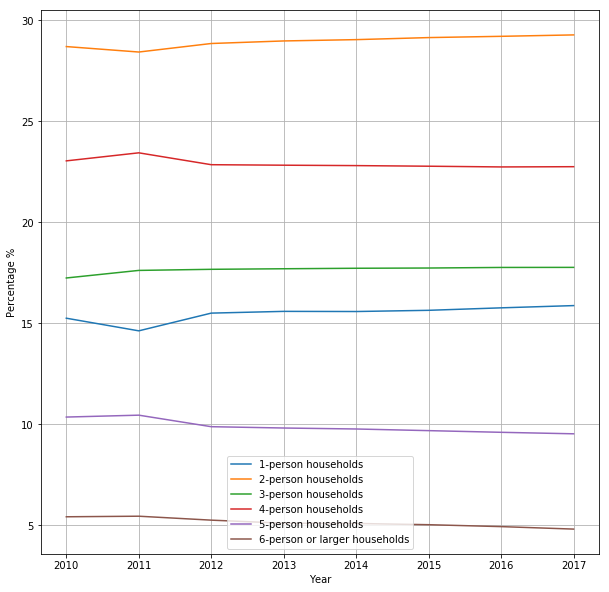

In [251]:
yticks = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
ylabels = [5, 10,  15, 20, 25, 30]

plt.figure(figsize=(10, 10))
plt.plot(hh_sizes_evolution.transpose())
plt.grid()
plt.yticks(yticks, ylabels)
plt.xlabel('Year')
plt.ylabel('Percentage %')
plt.legend(household_types)
plt.show()

**Observation:** We can see, that the percentual change in the number of persons per household is rather constant. A slight growth in 1-3 person households goes along with a decrease of the number of 5 or more persons per household. This leads already to a conclusion, that big shared spaces loose in popularity. This could yet also be due to smaller families, as probably people do have less children nowadays. It could also be a symptom of more luxus and comfort to not share accommodations but to rather live in small households.

### Map the Incomes per Municipality of 2007

This dataset is very valuable, as it presents data for all municipalities for the mean incomes and the distribution of the populations age. Meanwhile, it is a handycap, that it only is available for 2007. 

We will research the trend of the more actual data for cantons (2011-2016) and extrapolate the data of 2007 for an actual scenario of the incomes. 

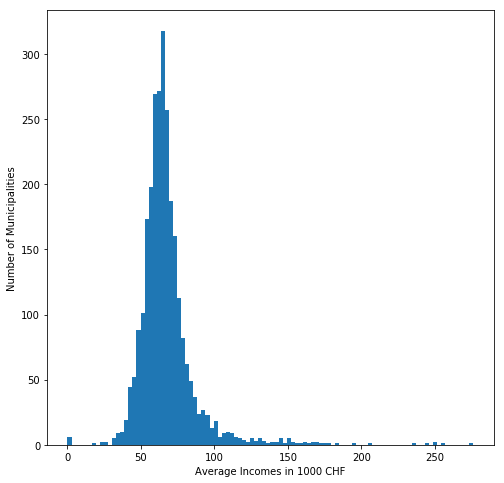

In [334]:
# the revenues of all municipalities can be compared in the histogram below.

plt.figure(figsize=(8,8))
plt.hist(incomes['MEANREV'], bins=100)
plt.xlabel('Average Incomes in 1000 CHF')
plt.ylabel('Number of Municipalities')
plt.show()

**Observations:** The matching of mean incomes and household sizes will certainly be very intersting on a municipal level. It is obvious, that a large part of the communes do have mean revenues around 60k CHF per year. Still, a lot of outliers until up to 280k are to be found. Our second research question wants to find the correlation between these two variables, do rich people rather live alone than in shared accommodations?

In [ ]:
# EXTRAPOLATION TO DO

In [252]:
# MAPPING TO DO

### Mean Wages Evolution

For the before named extrapolation that we are planning, we have to carefully analyse the dataset of the mean wages for the years 2008, 2010, 2012, 2014 and 2016. They are not very handy, as they are in different datasets for each region. This should be improved in the datawrangling, so they storage is similar to the other datasets. 

In [376]:
wages_years = ['2008', '2010', '2012', '2014', '2016']
mean_incomes_ch = []
mean_incomes_foreigners = []

for i in wages_years:
    mean_incomes_ch.append(float(globals()['wages%sch' %i][' Median'][3]))
    mean_incomes_foreigners.append(float(globals()['wages%sch' %i][' Median'][5]))

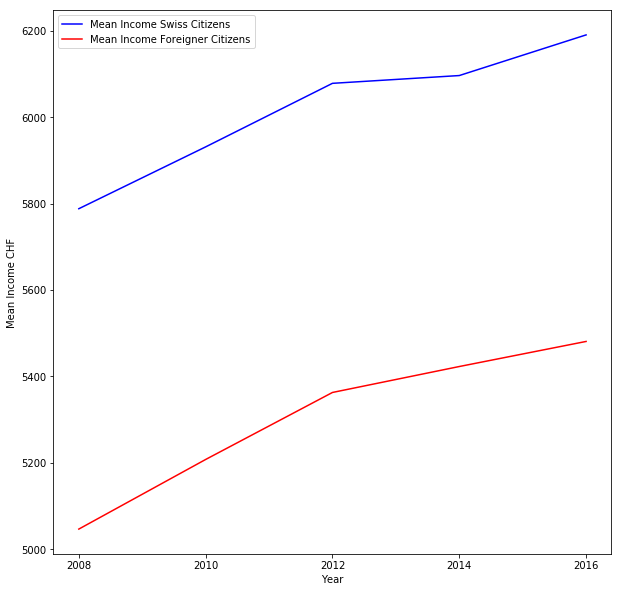

In [383]:
plt.figure(figsize=(10,10))
plt.plot(mean_incomes_ch, 'b-', 
         mean_incomes_foreigners, 'r-')
plt.xlabel('Year')
plt.ylabel('Mean Income CHF')
plt.legend(['Mean Income Swiss Citizens', 'Mean Income Foreigner Citizens'])
plt.xticks(range(0,5), wages_years)
plt.show()

**Observations:** A trend can easily be dedicated from the graph above. Already with this information, an extrapolation of the data for the municipalities from 2007 is possible. Meanwhile, we have to be aware, that we loose some information, for example the spatial different developments of the mean incomes (would only be given with municipality-resoluted data for the present years). 

On the same time, it is eyecatching, that foreigners earn generally 800 CHF less, than the mean Swiss citizen. 

### Demographics Analysis

In [279]:
region_rows = [2,3,7,13,18,26]
non_int_rows = [0,1,]

for i in range(2010,2018):
    
    globals()['demographics%s_cantons' %i] = (globals()['demographics%s' %i]
                                              .drop(itertools.chain(region_rows, non_int_rows))
                                              .reset_index().drop('index', 1))
    globals()['demographics%s_regions' %i] = (globals()['demographics%s' %i].iloc[region_rows])


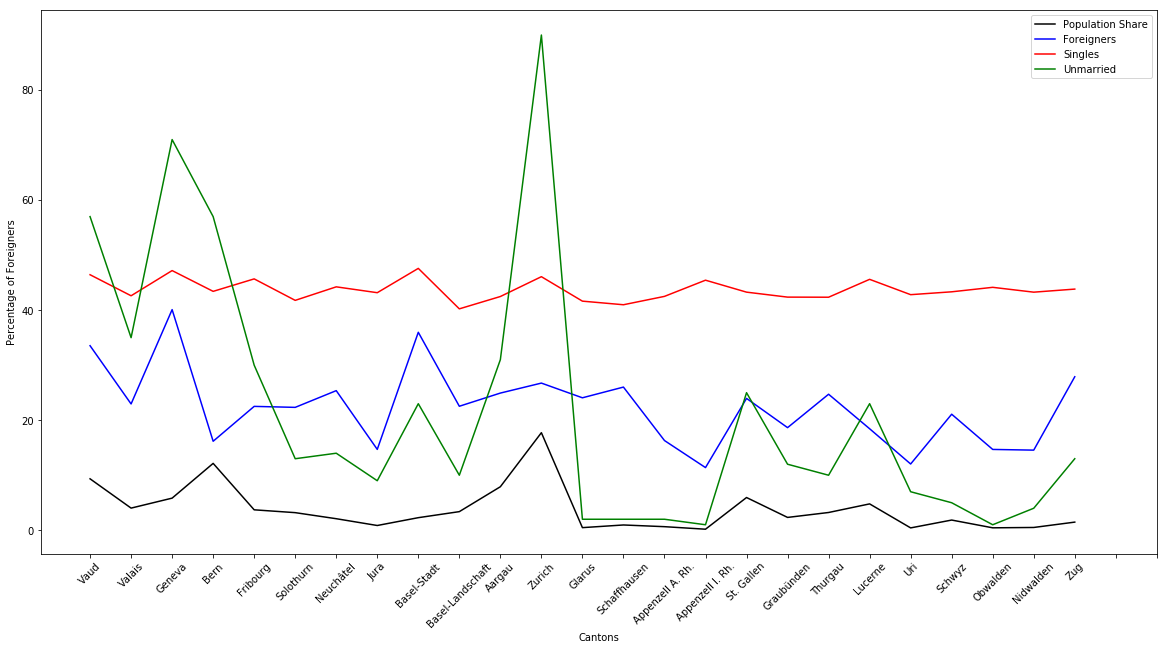

In [313]:
cantons_list = demographics2010_cantons['Region']

plt.figure(figsize=(20, 10))
plt.plot(demographics2017_cantons['Population']/demographics2017_regions['Population'][2]*100, 'k-',
        demographics2017_cantons['Foreigner']/demographics2017_cantons['Population']*100, 'b-',
        demographics2017_cantons['Single']/demographics2017_cantons['Population']*100, 'r-',
        demographics2017_cantons['Unmarried'], 'g-')
plt.xlabel('Cantons')
plt.ylabel('Percentage of Foreigners')
plt.xticks(range(0,27),cantons_list, rotation=45 )
plt.legend(['Population Share', 'Foreigners', 'Singles', 'Unmarried'])
plt.show()

**Observations:** First conclusions that can be drawn from the demographics of 2017 are, that the percentual share of foreigner does variate by around +/- 12 % around a mean of 23. It will therefore be interesting, to investigate this variable together with the household sizes per canton. The latter have still to be produced, by only aggregating the layers of hh_sizesXXXX to cantonal resolution (now in municipality). 
Furthermore, the variable ummarried seems to be biased by incomplete data, as in some cantons only 2 % are unmarried, while in Zurich 80 % of the people are unmarried. The variable single can be with some others of this dataset be intersting to compare with the distribution of household sizes.

### Rents depending on Swiss or Foreigners, room size and age

With those two datasets (rental_foreignersXXXX and rentalsXXXX), we will be able to compare our hypothesis of households depending on the number of foreigners with the effective prices. Unfortunately, they are only comparable on a regional basis. 

In [353]:
rental_foreigners2016

,Unnamed: 0,Region,average rent all,household with only Swiss,hh with min 1 Swiss and 1 foreigner,household with only foreigners
0,0,Schweiz,1322,1300,1504,1305
1,1,Genferseeregion,1316,1258,1505,1343
2,2,Espace Mittelland,1145,1149,1302,1073
3,3,Nordwestschweiz,1328,1317,1489,1293
4,4,Zürich,1553,1517,1707,1564
5,5,Ostschweiz,1189,1207,1348,1103
6,6,Zentralschweiz,1446,1407,1650,1491
7,7,Tessin,1150,1156,1288,1097


In [345]:
rentals2013

,Unnamed: 0,Region,average_rent,<25,25-64,65+,<25 and 25-64,<25 and 65+,25-64 and 65+,"<25, 25-64, and 65+"
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Suisse,1332.0,1096.0,1287.0,1143.0,1546.0,1346,1328.0,1604.0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Genferseeregion,1332.0,1099.0,1251.0,1094.0,1602.0,***** 1'374,1299.0,1626.0
4,4,Espace Mittelland,1161.0,970.0,1125.0,1016.0,1341.0,***** 1'203,1165.0,1453.0
5,5,Nordwestschweiz,1321.0,1110.0,1272.0,1174.0,1531.0,***** 1'600,1300.0,1566.0
6,6,Zürich,1549.0,1254.0,1516.0,1343.0,1759.0,***** 1'485,1523.0,1853.0
7,7,Ostschweiz,1218.0,1071.0,1169.0,1075.0,1397.0,***** 1'197,1299.0,1447.0
8,8,Zentralschweiz,1446.0,1191.0,1412.0,1215.0,1670.0,***** 1'084,1425.0,1459.0
9,9,Tessin,1166.0,961.0,1107.0,1037.0,1369.0,***** 1'330,1241.0,1508.0


### Concatenation of Household data and Income data

In [ ]:
#TO DO

### Comparison and Dedication of Correlation between household size and origin

In [384]:
#TO DO

### Draft and Model for the realizations of the maps

Note, that the geojson for the municipalities of Switzerland is available, but has a size of 90 mb. (See TA Question in the read file for this). 

In [54]:
#Load TopoJSon for cantons and GeoJSon for communes
cantons_json = json.load(open(map_folder + 'ch-cantons.topojson.json'))
commune_json = json.load(open(map_folder + 'communes.geojson'))

In [55]:
#Add functions for creating map based on the region and the appropriate colors for each region
def createMap(region):
    m = folium.Map(location=[46.8182, 8.2275], tiles='cartodbpositron', zoom_start=8, min_zoom=8, max_zoom=11)

    # Add borders
    if region == 'cantonal':
        folium.TopoJson(data=cantons_json, object_path='objects.cantons',
                style_function= lambda feature: {'color':'#007700', 'weight':1}
               ).add_to(m)
    elif region == 'communal': #jupyter seems to be overwhelmed with the data size on a laptop and does not display
        folium.GeoJson(commune_json).add_to(m)
    elif region == 'regional':
        folium.TopoJson(data=cantons_json, object_path='objects.cantons',
                style_function= lambda feature: get_color(feature)
               ).add_to(m)
    return m

def get_color(feature):
    canton = feature['id']
    if canton in {'VD','VS','GE'}:
        return {'color':'#42dff4', 'weight':1}
    elif canton in {'BS','BL','AG'}:
        return {'color':'#bada55', 'weight':1}
    elif canton in {'LU','UR','SZ','OW','NW','ZG'}:
        return {'color':'#660066', 'weight':1}
    elif canton in {'BE','FR','SO','NE','JU'}:
        return {'color':'#947c44', 'weight':1}
    elif canton in 'ZH':
        return {'color':'#ff4444', 'weight':1}
    elif canton in 'TI':
        return {'color':'#ffa500', 'weight':1}
    else:
        return {'color':'#003366', 'weight':1}

#def get_regions(cantonal_geo):
    for item in cantonal_geo['objects']['cantons']['geometries']:
        if item['id'] == 'VD' or 'VS' or 'GE':
            item['properties']['style']['color'] = '#3ca392'
            

In [56]:
ch_region = createMap('regional')
ch_region

In [57]:
#Save map as HTML
ch_region.save("ch_regions.html")